<a href="https://colab.research.google.com/github/wish1421/BAIN/blob/main/Week_2_Bayes_Theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 2 - Bayes Theorem
This is the first file for Week 2 content. In this we'll go over basics of Bias Theorem, and we'll study what are priors and posteriors, and also read about single parameter inference. So, Without further ado, let’s contemplate, in all its majesty, the **Bayes’ theorem:**
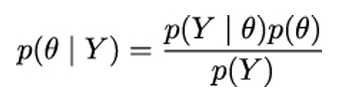

Well, it's not that impressive, is it? It looks like an elementary school formula, and yet, paraphrasing Richard Feynman, this is all you need to know about Bayesian statistics. Learning where Bayes' theorem comes from will help us understand its meaning.

## 2.1 Derivation:

According to the product rule (derived from conditional probability), we have:
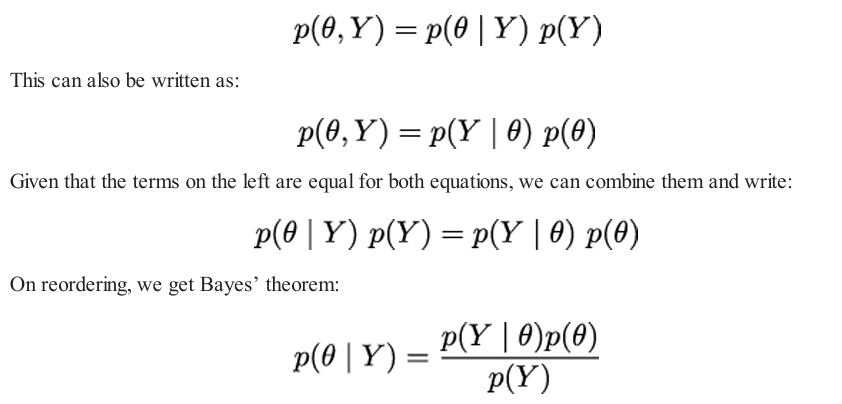



Why is Bayes' theorem that important? Let's see.

First, it says that p(θ|Y ) is not necessarily the same as p(Y |θ).

If we replace θ with “hypothesis” and Y with “data,” Bayes' theorem tells us how to compute the probability of a hypothesis, θ, given the data, Y , and that's the way you will find Bayes' theorem is explained in a lot of places.

When we talk about a "hypothesis" in Bayes' theorem, we're referring to a guess or an idea. And when we talk about "data," we mean the information we have. Bayes' theorem helps us calculate how likely our guess (hypothesis) is true based on the information we have (data). But, how do we turn a hypothesis into something that we can put inside Bayes' theorem? We do this by using something called probability distributions. Basically, instead of just any guess, we focus on finding the best details within our guess. So, our hypothesis becomes really specific, and we aim to find the most suitable values for certain details, like parameters in probability distributions. This way, we make our guess as accurate as possible before using Bayes' theorem to analyze it.

Bayes' theorem is central to Bayesian statistics. As we will see later in Week 2, using tools such as PyMC frees us of the need to explicitly write Bayes' theorem every time we build a Bayesian model.

Understanding the components of Bayes' theorem is crucial because we'll frequently mention them, and comprehending each part helps us grasp the models better. So, let me rewrite Bayes' theorem now with labels:

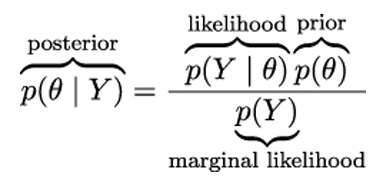


**Prior Distribution: p(θ)** <br>
The "prior distribution" represents what we already know about a parameter (like θ) before we see any data (Y). If we're completely clueless, like Jon Snow, we might use flat priors (uniform distribution), which don't give much information.

But usually, we can do better than that, as we'll discover. The idea of using priors is why some folks still see Bayesian statistics as subjective. Even though priors are just assumptions we make when building models, they're no more or less subjective than other assumptions, like likelihoods.

**Likelihood: p(Y|θ)** <br>
The likelihood is how we bring data into our analysis. It shows how likely the data is given certain parameters. Some texts might call this the sampling model, statistical model, or just model. But we'll call it the likelihood, and we'll combine it with the priors in our analysis.


**Posterior Distribution: p(θ|Y)** <br>
The posterior distribution is what we get after doing Bayesian analysis. It tells us everything we know about a problem based on our data and model. Unlike a single value, it's a whole probability distribution for the parameters in our model. This distribution balances our prior beliefs with the new data, called the likelihood.

Conceptually, we can think of the posterior as the updated prior in light of (new) data. In theory, we can use the posterior from one analysis as the prior for the next one, which makes Bayesian analysis great for handling data that comes in gradually over time.

**Marginal Likelihood: p(Y)** <br>
The last term is the marginal likelihood, sometimes referred to as the evidence. Formally, the marginal likelihood is the probability of observing the data averaged over all the possible values the parameters can take (as prescribed by the prior). We can write this as ∫p(Y |θ)p(θ)dθ.

But for the moment, we can think of it as a normalization factor that ensures the posterior is a proper pmf or pdf. If we ignore the marginal likelihood, we can write Bayes' theorem as a proportionality, which is also a common way to write Bayes' theorem:
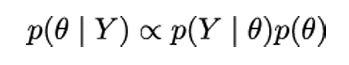

## 2.2 Interpreting probabilities:

Probabilities can be interpreted in various useful ways. For instance, we can think that P(A) = 0.125 means that if we repeat the survey many times, we would expect a l three individuals to answer “yes”
 about 12.5% of the time. We are interpreting probabilities as the outcome of long-run experiments. This
 is a very common and useful interpretation. It not only can help us think about probabilities but can also
 provide an empirical method to estimate probabilities. This is usually called the frequentist interpretation.

 Another interpretation of probability, usua ly ca led subjective or Bayesian interpretation, states that probabilities can be interpreted as measures of an individual's uncertainty about events. Bayesian statistics is just a procedure to make scientific statements using probabilities as building blocks.


## 2.3 Probabilities, uncertainty, and logic

* Probabilities help us measure uncertainty. If we do not have information about a problem,, we might treat all possible outcomes equally likely. This is equivalent to assigning the same probability to every possible event.
* If we know instead that
 some events are more likely, then this can be forma ly represented by assigning a higher probability to
 those events and less to the others.
* An event is just any of the possible values (or a subset of values) a variable can
 take, such as the event that you are older than 30, the price of a Sachertorte, or the number of bikes that
 wil be sold next year around the world.

* The concept of probability is also related to the subject of logic. Under classical logic, we can only have
 statements that take the values of true or false. Under the Bayesian definition of probability, certainty is
 just a special case: a true statement has a probability of 1, and a false statement has a probability of 0.

* Assigning a probability of 0 is difficult due to various uncertainties, but Cromwell's rule suggests reserving 0 and 1 for logically true or false statements.

* Bayes' theorem follows logically from probability rules, making Bayesian statistics an extension of logic useful for dealing with uncertainty. This approach acknowledges that uncertainty is common due to incomplete or noisy data and limitations of human cognition.


**The Bayesian Ethos** <br>
Probabilities are used to measure the uncertainty (in terms of probability) we have about parameters, and Bayes' theorem serves as a tool to appropriately revise these probabilities when new data becomes available. The aim is to reduce uncertainty by integrating new information into our existing understanding.


Now that we know what Bayesian statistics is, let's learn how to do Bayesian statistics with a simple example of **coin-flipping problem**. We are going to begin inferring a **single, unknown parameter**.
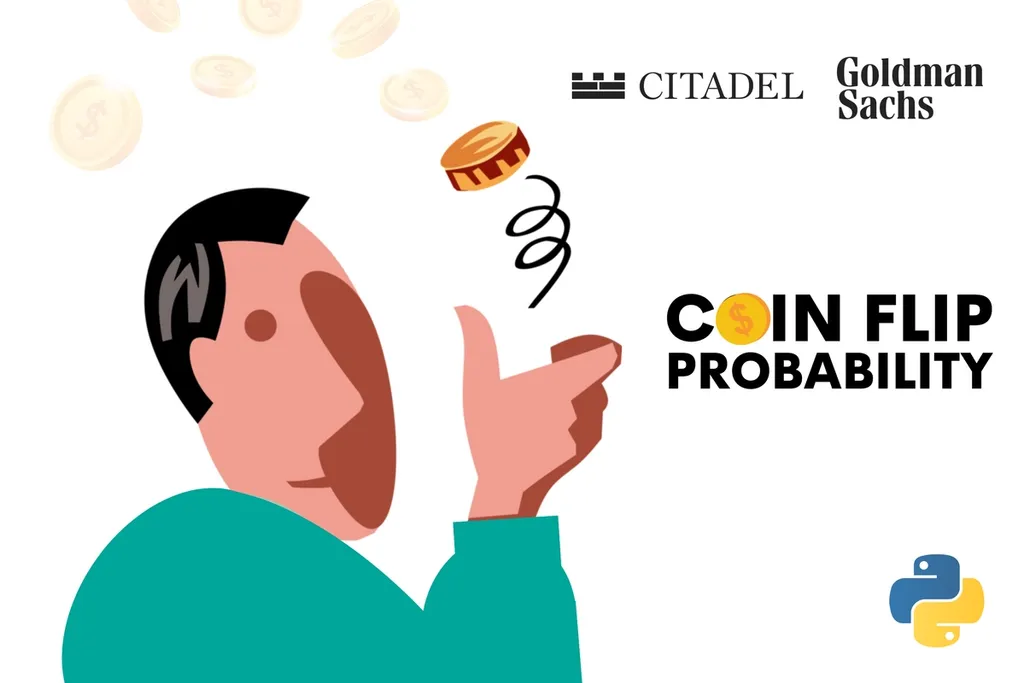
 ## 2.4 Single-parameter inference

 The coin-flipping problem, or the BetaBinomial model, is a classical
 problem in statistics and goes like this: we toss a coin several times and record how many heads and
 tails we get. Based on this data, we try to answer questions such as, is the coin fair? Or, more generally,
 how biased is the coin?


### 2.4.1 Introduction -
The coin-flipping problem is a great example to learn the basics of Bayesian statistics because it is a
 simple model that we can solve and compute with ease. Besides, many real problems consist of binary,
 mutua ly exclusive outcomes such as 0 or 1, positive or negative, odds or evens, spam or ham, hotdog or
 not a hotdog, cat or dog, safe or unsafe, and healthy or unhealthy. Thus, even when we are talking about
 coins, this model applies to any of those problems.

To estimate the bias of a coin, and in general, to answer any questions in a Bayesian setting, we wil need data and a probabilistic model. For this
 example, we wil assume that we have already tossed a coin several times and we have a record of the
 number of observed heads, so the data-gathering part is already done.

 Getting the model wil take a little
 bit more effort. Since this is **our first model**, we will explicitly write Bayes' theorem and do all the
 necessary math and we will proceed very slowly.

 From next onward, we wil use PyMC and our computer to do the math for us.




### 2.4.2 Choosing the likelihood:
Let's assume that only two outcomes are possible—heads or tails—and let's also assume that coin tosses are independent of each other.
We will further assume all coin tosses come from the same distribution. Thus the random variable coin toss is an example of an independent and identically distributed (iid) variable. I hope you agree
that these are very reasonable assumptions to make for our problem.

Given these assumptions, a good candidate for the likelihood is the Binomial distribution:
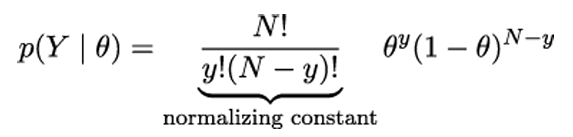

 This is a discrete distribution returning the probability of getting y heads (or, in general, successes) out of
 N coin tosses (or, in general, trials or experiments) given a fixed value of θ.

Let us plot nine distributions from the Binomial family; each subplot has its legend indicating the values of the parameters. The values on y-axis are shown so that you can check for yourself that if you sum the height of all bars, you wil get 1. That is, for discrete distributions, the height of the bars represents actual probabilities.

In [ ]:
# Setting up the dependencies: (DONOT EDIT THE LINES BELOW)
!pip install pymc==5.8.0 arviz==0.16.1 bambi==0.13.0 pymc-bart==0.5.2 kulprit==0.0.1 preliz==0.3.6 nutpie==0.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.4/468.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 67.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: pytensor
    Found existing installation: pytensor 2.18.6
    Uninstalling pytensor-2.18.6:
      Successfully uninstalled pytensor-2.18.6
  Attempting uninstall: arviz
    Found exist

In [ ]:
# Import necessary libraries
import arviz as az  # For Bayesian data analysis and visualization
import matplotlib.pyplot as plt  # For plotting
import numpy as np  # For numerical operations
from scipy.special import binom, beta  # For binomial and beta distributions
import preliz as pz # defining priors
from cycler import cycler
import math

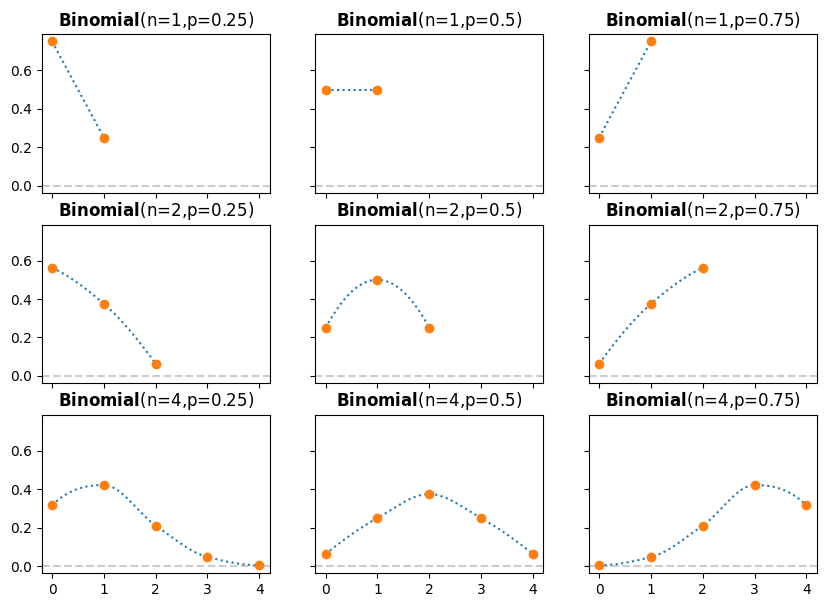

In [ ]:
n_params = [1, 2, 4] # Number of trials
p_params = [0.25, 0.5, 0.75] # Probability of success

_, axes = plt.subplots(3, 3, figsize=(10, 7), sharex=True, sharey=True)
for i, n in enumerate(n_params):
    for j, p in enumerate(p_params):
        pz.Binomial(n, p).plot_pdf(legend="title", ax=axes[i, j])
# plt.savefig("../fig/binomial_distribution.png")

The Binomial distribution is a reasonable choice for the likelihood. We can see that θ indicates how
 likely it is to obtain a head when tossing a coin. This is easier to see when N = 1 but is valid for any
 value of N, just compare the value of θ with the height of the bar for y = 1 (heads).


### 2.4.3 Choosing the prior
 As a prior, we wil use a Beta distribution, which is a common distribution in Bayesian statistics and
 looks as folows:

 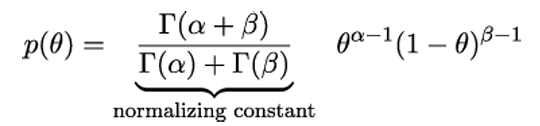

 If we look carefuly, we wil see that the Beta distribution looks similar to the Binomial except for the
 first term. Γ is the Greek uppercase gamma letter, which represents the gamma function, but that’s not
 rea ly important. What is relevant for us is that the first term is a normalizing constant that ensures the
 distribution integrates to 1. We can see from the preceding formula that the Beta distribution has two
 parameters, α and β.


Let's plot some members of the Beta family.

(-0.2, 5.0)

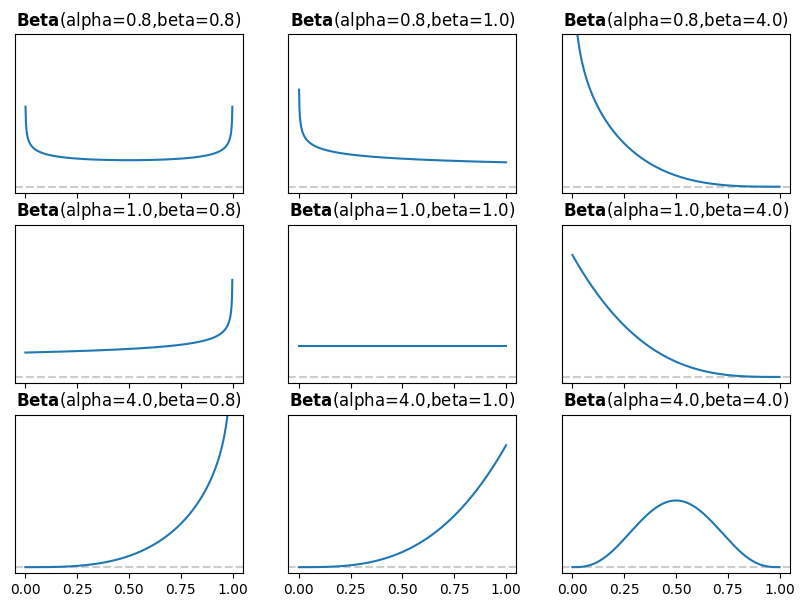

In [ ]:
params = [0.8, 1, 4]

_, axes = plt.subplots(3, 3, figsize=(10, 7), sharex=True, sharey=True)
for i, alpha in enumerate(params):
    for j, beta in enumerate(params):
        pz.Beta(alpha, beta).plot_pdf(legend="title", ax=axes[i, j])
axes[0][0].set_ylim(-0.2, 5)
# plt.savefig("../fig/beta_distribution.png")

You must be thinking that these are all nice shapes, but why the hell are we using it for our model?

 There are many reasons to use a Beta distribution for this and other problems. One of them is that the
 Beta distribution is restricted to be between 0 and 1, in the same way our θ parameter is. In general, we
use the Beta distribution when we want to model the proportions of a Binomial variable. Another reason
 is its versatility.


 As you can see above, this distribution adopts several shapes (all restricted to
 the [0,1] interval), including a Uniform distribution, Gaussian-like distributions, and U-like distributions.

As a third reason, the Beta distribution serves as the conjugate prior to the Binomial distribution (which we are using as the likelihood). A conjugate prior of a likelihood is a prior that, when combined with a given likelihood, yields a posterior with the same functional form as the prior.

To simplify, whenever we utilize a Beta distribution as the prior and a Binomial distribution as the likelihood, we will obtain a Beta distribution as the posterior. Other pairs of conjugate priors exist; for instance, the Normal distribution acts as its own conjugate prior.

For many years, Bayesian analysis was limited to the use of conjugate priors. Conjugacy ensures the mathematical tractability of the posterior, which is significant as a common issue in Bayesian statistics involves encountering analytically unsolvable posteriors.

This constraint was a deal-breaker until the development of suitable computational methods to solve probabilistic models.

You may watch this video if you are not comfortable with Priors, Posteriors and Conjugate Posteriors:
https://youtu.be/0F0QoMCSKJ4?si=NOtSqpmbVHSbuthT

### 2.4.4 Getting the Posterior

 Let's remember that Bayes' theorem says the posterior is proportional to the likelihood times the prior. So, for our problem, we have to multiply the Binomial and the Beta distributions:
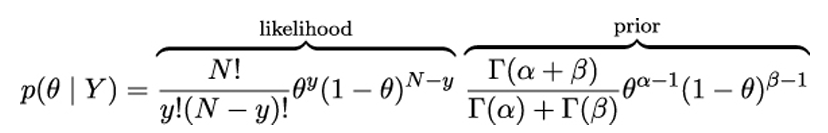

We can simplify this expression by dropping all the terms that do not depend on θ and our results will stil be valid. Accordingly, we can write:
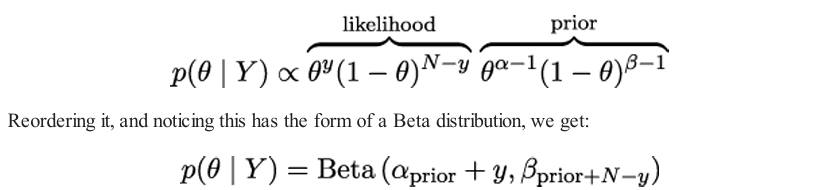




 Based on this analytical expression, we can compute the posterior. Lets' plot the results for 3 priors and different numbers of trials.

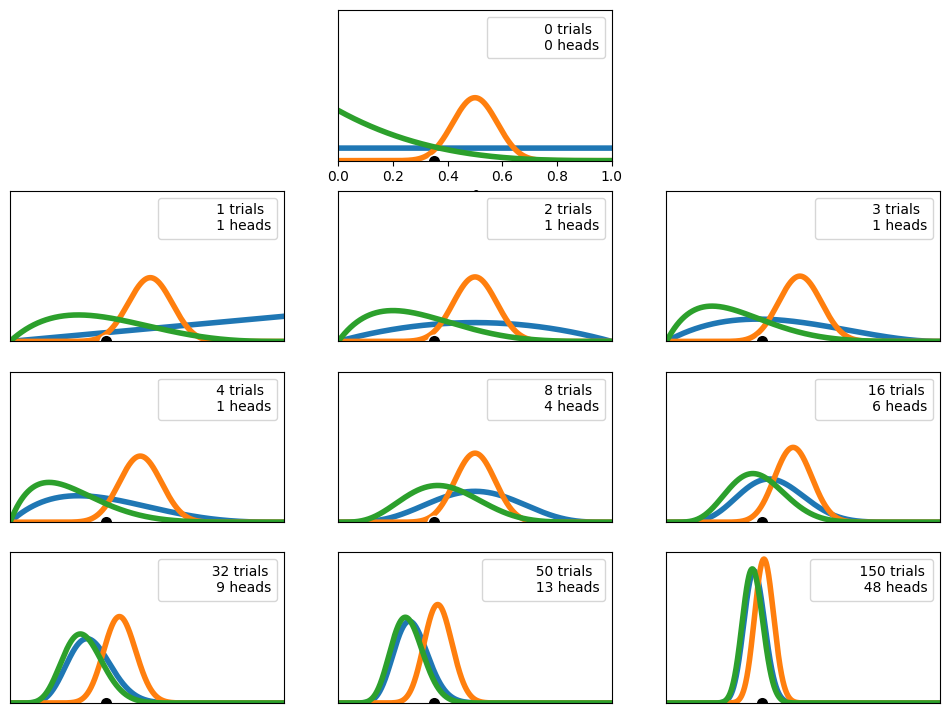

In [ ]:
plt.figure(figsize=(12, 9))

n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
n_heads = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

beta_params = [(1, 1), (20, 20), (1, 4)]
x = np.linspace(0, 1, 2000)

for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = n_heads[idx]
    for (α_prior, β_prior) in beta_params:
        posterior = pz.Beta(α_prior + y, β_prior + N - y).pdf(x)
        plt.plot(x, posterior, lw=4)

    plt.plot(theta_real, 0, ms=9, marker='o', mec='w', mfc='k')
    plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])

# plt.savefig("../fig/beta_binomial_posterior.png")

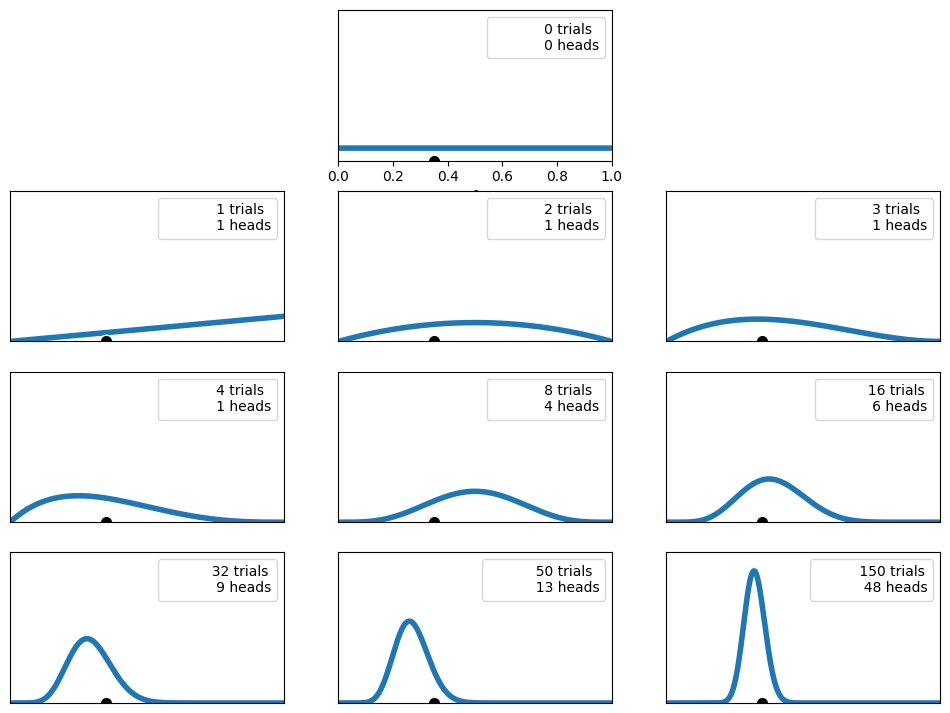

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import beta

plt.figure(figsize=(12, 9))

n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
n_heads = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

# Use a uniform prior for all cases (α_prior = β_prior = 1)
alpha_prior = beta_prior = 1
x = np.linspace(0, 1, 2000)

for idx, N in enumerate(n_trials):
  if idx == 0:
    plt.subplot(4, 3, 2)
    plt.xlabel('θ')
  else:
    plt.subplot(4, 3, idx+3)
    plt.xticks([])
  y = n_heads[idx]

  posterior = beta(alpha_prior + y, beta_prior + N - y).pdf(x)
  plt.plot(x, posterior, lw=4)

  plt.plot(theta_real, 0, ms=9, marker='o', mec='w', mfc='k')
  plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
  plt.xlim(0, 1)
  plt.ylim(0, 12)
  plt.legend()
  plt.yticks([])

# plt.savefig("../fig/beta_binomial_posterior.png")


On the first subplot in the middle, we have zero trials, thus the three curves represent our priors:

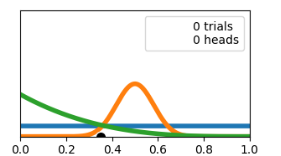


* The Uniform prior (blue): This represents all the possible values for the bias being equally probable a priori.
* The Gaussian-like prior (orange): This is centered and concentrated around 0.5, so this prior is compatible with information indicating that the coin has more or less about the same chance of landing heads or tails. We could also say this prior is compatible with the knowledge that coins are fair.
* The skewed prior (green): This puts most of the weight on a tail-biased outcome

The rest of the subplots show posterior distributions as we perform successive trials. The number of trials (or coin tosses) and the number of heads are indicated in each subplot's legend.

There is also a black dot at 0.35 representing the true value for θ. Of course, in real problems, we do not know this value, and it is here just for pedagogical reasons.

The above figure can teach us a lot about Bayesian analysis, so grab your
coffee, tea, or favorite drink, and let's take a moment to understand it:

* The result of a Bayesian analysis is a posterior distribution - not a single value but a distribution of plausible values given the data and our model.

* The most probable value is given by the mode of the posterior (the peak of the distribution).

* The spread of the posterior is proportional to the uncertainty about the value of a parameter; the more spread out the distribution, the less certain we are.

* Intuitively, we are more confident in a result when we have observed more data supporting that result. Thus, even when numerically: 1/2 = 4/8  = 0.5, seeing four heads out of eight trials gives us more confidence that the bias is 0.5 than observing one head out of two trials. This intuition is reflected in the posterior, as you can check for yourself if you pay attention to the (blue) posterior in the third and sixth subplots; while the mode is the same, the spread (uncertainty) is larger in the third subplot than in the sixth subplot.

* Given a sufficiently large amount of data, two or more Bayesian models with different priors will
 tend to converge to the same result. In the limit of infinite data, no matter which prior we use, all of
 them wil provide the same posterior.

*  Remember that infinite is a limit and not a number, so from a practical point of view, we could get practically equivalent posteriors for a finite and relatively small number of data points.

* How fast posteriors converge to the same distribution depends on the data and the model. We can see that the posteriors arising from the blue prior (Uniform) and green prior (biased towards tails) converge faster to almost the same distribution, while it takes longer for the orange posterior (the
 one arising from the concentrated gaussian-like prior). Even after 150 trials, it is somehow easy to recognize the
 orange posterior as a different distribution from the two others.

* Something not obvious from the figure is that we will get the same result if we update the posterior
 sequentially as if we do it all at once. We can compute the posterior 150 times, each time adding one
 more observation and using the obtained posterior as the new prior, or we can just compute one
 posterior for the 150 tosses at once. The result wil be exactly the same. This feature not only
 makes perfect sense, but it also leads to a natural way of updating our estimations when we get new
 data, a situation common in many data-analysis problems.

### 2.4.5 The influence of the prior

From the preceding example, it is clear that priors can influence inferences. That’s fine – priors are
 supposed to do that. Maybe it would be better to not have priors at all. That would make modeling
 easier, right? Well, not necessarily. If you are not setting the prior, someone else wil be doing it for you.
Sometimes this is fine – default priors can be useful and have their place – but sometimes it is better to
 have more control. Let me explain.

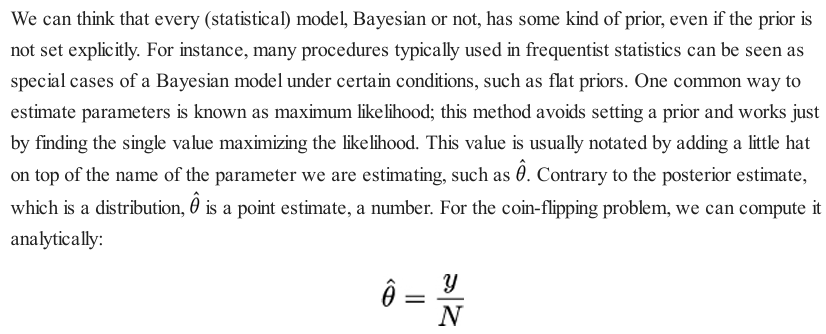

Going back to the above figure, you will be able to check for yourself that the mode of the blue posterior (the one corresponding to the uniform/flat prior) agrees with the values of θ, computed for each subplot. This is not a coincidence; it is a consequence of the fact that setting a Uniform prior and
 then taking the mode of the posterior is equivalent to maximum likelihood.

We cannot avoid priors, but if we include them in our analysis, we can get some potential benefits. The
 most direct benefit is that we get a posterior distribution, which is a distribution of plausible values and
 not only the most probable ones. Having a distribution can be more informative than a single-point
 estimate, as we saw the width of the distribution is related to the uncertainty we have for the estimate.
 Another benefit is that computing the posteriors means to average over the prior. This can lead to
 models that are more difficult to overfit and more robust predictions.

 Sometimes a wise choice of prior can make inference easier or faster. It is important to
 remark that we are not advocating for setting priors specifica ly to make inference faster, but it is often
 the case that by thinking about priors, we can get faster models.

 One advantage of priors, one that is sometimes overlooked, is that having to think about priors can force
 us to think a little bit deeper about the problem we are trying to solve and the data we have. Sometimes
 the modeling process leads to a better understanding by itself irrespective of how we l we end and fit
 the data or make predictions. By being explicit about priors, we get more transparent models, meaning
 they’re easier to criticize, debug (in a broad sense of the word), explain to others, and hopefuly
 improve.


## 2.5 How to choose priors
We can chose priors without being afraid that  the prior distribution will not let the data speak
 for itself! That's OK, but we have to remember that data does not speak; at best, data murmurs.

 Some people like the idea of using non-informative priors (also known as flat, vague, or diffuse priors).
 These priors have the least possible amount of impact on the analysis. While it is possible to use them
 for some problems deriving truly non-informative priors can be hard or just impossible. Additionally, we
 generally can do better as we usually have some prior information.

###  We will prefer weakly informative priors.
 For many problems, we often know something
 about the values a parameter can take. We may know that a parameter is restricted to being positive, or
 we may know the approximate range it can take, or whether we expect the value to be close to zero or
 below/above some value. In such cases, we can use priors to put some weak information in our models
 without being afraid of being too pushy. Because these priors work to keep the posterior distribution
 within certain reasonable bounds, they are also known as regularizing priors.

 Informative priors are very strong priors that convey a lot of information. Using them is also a valid
 option. Depending on your problem, it could be easy or not to find good-quality information from your
 domain knowledge and turn it into priors. Like in the above coin-flipping example, if you use your JEE combinatorics knowledge, you'd know that having a binomial prior seems to be the best you can think of.

 ### The Magic of Preliz
  PreliZ is a very new Python library for prior elicitation. Its
 mission is to help you to elicit, represent, and visualize your prior knowledge. For instance, we can ask PreliZ to compute the parameters of a distribution satisfying a set of constraints.

Let’s say we want to find the Beta distribution with 90% of the mass between 0.1 and 0.7, then we can write:





(<Axes: >,
  message: Optimization terminated successfully
  success: True
   status: 0
      fun: 0.30105907090670136
        x: [ 2.475e+00  3.610e+00]
      nit: 9
      jac: [ 2.580e-03  1.028e-01]
     nfev: 29
     njev: 9)

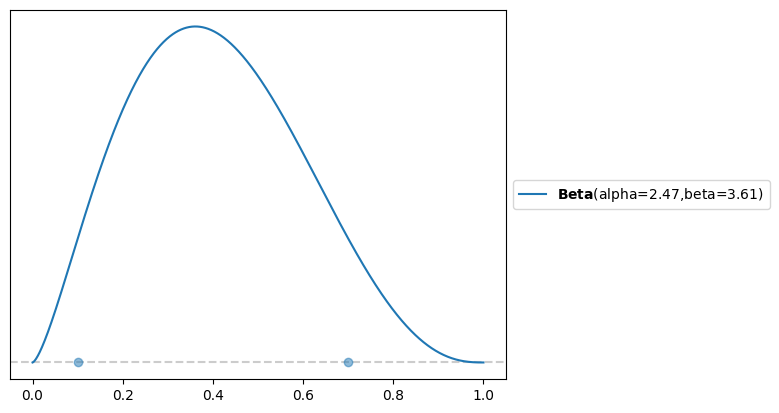

In [ ]:
dist = pz.Beta()
pz.maxent(dist, 0.1, 0.7, 0.9)
# plt.savefig("../fig/maxent_beta.png")

The result is a Beta distribution with parameters α = 2.5 and β = 3.6 (rounded to the first decimal point).

    x: [ 2.475e+00  3.610e+00]


 The pz.maxent function computes the maximum entropy distribution given the constraints we
 specified. Why maximum entropy distribution? Because that is equivalent to computing the least
 informative distribution under those constraints.

As eliciting prior has many facets, PreliZ offers many other ways to elicit priors. If you are interested in
 learning more about PreliZ, you can check the documentation at
https://preliz.readthedocs.io.

We are free to use more than one prior (or likelihood) for a given analysis if we are not sure about any special one; exploring the effect of different priors can also bring valuable information to the table. Part of the modeling process is about questioning assumptions, and priors (and likelihoods) are just that.

Different assumptions will lead to different models and probably different results. By using data and our domain knowledge of the problem, we wil be able to compare models and, if necessary, decide on a winner.



## 2.6 Communicating a Bayesian analysis
Creating reports and communicating results is central to the practice of statistics and data science. In
 this section, we wil briefly discuss some of the peculiarities of this task when working with Bayesian
 models.

  If you want to communicate the results of an analysis, you should also communicate the model you
 used. A common notation to represent probabilistic models is:

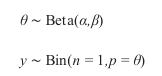

This is just the model we use for the coin-flip example. As you may remember, the ∼ symbol indicates
 that the variable on the left of it is a random variable distributed according to the distribution on the right.

 In many contexts, this symbol is used to indicate that a variable takes approximately some value, but
 when talking about probabilistic models, we wil read this symbol out loud, saying is distributed as.

 Thus, we can say θ is distributed as a Beta with parameters α and β, and y is distributed as a Binomial
 with parameters n = 1 and p = θ.



The very same model can be represented graphically using Kruschke
 diagrams as:

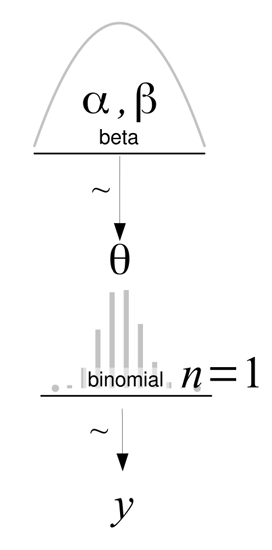

 On the first level, we have the prior that generates the values for θ, then the likelihood, and on the last
 line, the data, y. Arrows indicate the relationship between variables and the symbol ∼ indicates the
 stochastic nature of the variables.


## 2.7 Summarizing the posterior

The result of a Bayesian analysis is a posterior distribution, and all the information about the parameters (given a model and dataset) is contained in the posterior distribution. Thus, by summarizing the posterior,
 we are summarizing the logical consequences of a model and data.

 A common practice is to report, for
 each parameter, the mean (or mode or median) to have an idea of the location of the distribution and
 some measure of dispersion, such as the standard deviation, to have an idea of uncertainty in our
 estimates. The standard deviation works well for Normal-like distributions but can be misleading for
 other types of distributions, such as skewed ones.


 A commonly used device to summarize the spread of a posterior distribution is to use a Highest
Density Interval (HDI). An HDI is the shortest interval containing a given portion of the probability
 density. If we say that the 95% HDI for some analysis is [2,5], we mean that according to our data and
 model, the parameter in question is between 2 and 5 with a probability of 0.95. There is nothing special
 about choosing 95%, 50%, or any other value. We are free to choose the 82% HDI interval if we like.
 Idea ly, justifications should be context-dependent and not automatic, but it is okay to settle on some
 common value like 95%. As a friendly reminder of the arbitrary nature of this choice, the ArviZ default
 is 94%.

ArviZ is a Python package for exploratory analysis of Bayesian models, and it has many functions to
 help us summarize the posterior. One of those functions is `az.plot_posterior`, which we can use to
 generate a plot with the mean and HDI of θ. The distribution does not need to be a posterior distribution;
 any distribution wil work.

<Axes: title={'center': 'θ'}>

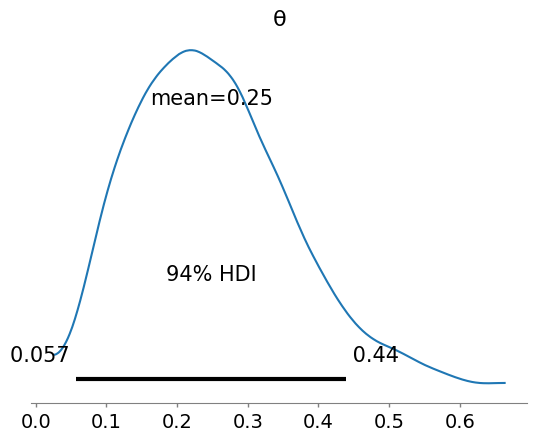

In [ ]:
np.random.seed(1)
az.plot_posterior({'θ':pz.Beta(4, 12).rvs(1000)})